# 1. Read file

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns

In [2]:
#Load data & print samples
df = pd.read_csv('/kaggle/input/spam-email-classification/email.csv')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#Descriptive Summary of the dataset
df.describe()

,Category,Message
count,5573,5573
unique,3,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 5573 entries, 0 to 5572
,Data columns (total 2 columns):
, #   Column    Non-Null Count  Dtype 
,---  ------    --------------  ----- 
, 0   Category  5573 non-null   object
, 1   Message   5573 non-null   object
,dtypes: object(2)
,memory usage: 87.2+ KB


# 2. Data processing

In [6]:
# Check for NA (null) values ​​in data
print("Number of NA values ​​in each column:")
# Will display the number of NA values ​​in each column
print(df.isna().sum())

Number of NA values ​​in each column:
,Category    0
,Message     0
,dtype: int64


In [7]:
# Add Category Number column with ham: 0 and spam: 1
df['Category_Number'] = df['Category'].map({'ham': 0, 'spam': 1})

In [8]:
print(df['Category_Number'].head())

0    0.0
,1    0.0
,2    1.0
,3    0.0
,4    0.0
,Name: Category_Number, dtype: float64


## 3.1. Word Clouds for Ham and Spam Messages

In [9]:
from wordcloud import WordCloud

## 3.2. Count occurrences of ham and spam

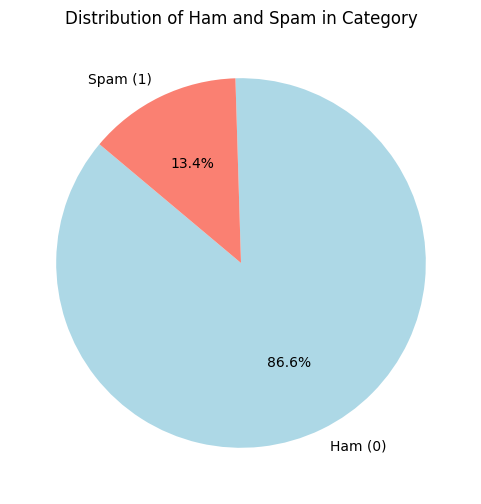

In [11]:
# Count the occurrences of each category
category_counts = df['Category_Number'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=['Ham (0)', 'Spam (1)'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'salmon'])
plt.title('Distribution of Ham and Spam in Category')
plt.show()

## 3.3. The chart shows the number of words in the message

# 4. Split the data set

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df['Message']
y = df['Category_Number']

In [18]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 5. Convert text to numbers

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
# While excluding common English stopwords
vectorizer = TfidfVectorizer(stop_words='english')

In [21]:
# Convert text to TF-IDF vector
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# 6. Building a Naive Bayes Model

In [22]:
from sklearn.naive_bayes import MultinomialNB

In [23]:
# Train the model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [24]:
# Prediction on test set
y_pred = model.predict(X_test_tfidf)

# 7. Model Evaluation

In [25]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [26]:
# Accuracy assessment
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Detailed report
class_names = ['ham', 'spam']
print(classification_report(y_test, y_pred, target_names=class_names))


Accuracy: 0.98
,              precision    recall  f1-score   support
,
,         ham       0.97      1.00      0.99       966
,        spam       1.00      0.83      0.90       149
,
,    accuracy                           0.98      1115
,   macro avg       0.99      0.91      0.95      1115
,weighted avg       0.98      0.98      0.98      1115
,


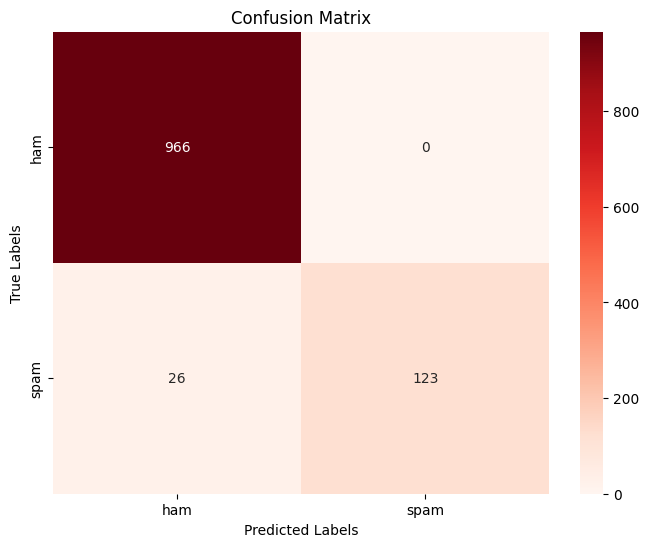

In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 8. Predictions on new data

In [28]:
new_emails = ["You've been selected for a special offer. Click here to claim your prize!","Congratulations! You've won a free ticket.", "Hi, can we schedule a meeting tomorrow?"]
new_emails_tfidf = vectorizer.transform(new_emails)
predictions = model.predict(new_emails_tfidf)

# Show result
for email, pred in zip(new_emails, predictions):
    print(f'Email: "{email}" -> Prediction: {pred}')


Email: "You've been selected for a special offer. Click here to claim your prize!" -> Prediction: 1.0
,Email: "Congratulations! You've won a free ticket." -> Prediction: 0.0
,Email: "Hi, can we schedule a meeting tomorrow?" -> Prediction: 0.0
